<center> <h1> Introduction to Data Science Phase 2 Project</h1></center>
<center> <h2> Group 6 </h2> </center>

<table>
<tr>
<th>Name
<th>ID
<th>Email
</tr>
</tr><tr>
<td><h3>Naga Venkata Siva Tejaswini Anguluri
<td><h3><b>2202760
<td><h3>nangulur@cougarnet.uh.edu
</tr><tr>
<td><h3>Sameer Shaik
<td><h3><b>2295647
<td><h3>sshaik6@cougarnet.uh.edu
<tr>
<td><h3>Goutham Reddy Kasireddy
<td><h3><b>2279917
<td><h3>gkasired@cougarnet.uh.edu
</tr>
<tr>
<td><h3>Suguna Chandana Sibbena
<td><h3><b>2311362
<td><h3>ssibbena@cougarnet.uh.edu
</tr>
<tr>
<td><h3>Prudhvi Kolla
<td><h3><b>2310127
<td><h3>pkolla@cougarnet.uh.edu
</tr>
</table>
  

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import plotly.offline as pyo
import warnings

warnings.filterwarnings("ignore")

In [2]:
#reading csv file
#imported the dataset that is being cleaned in phase1
df = pd.read_csv('creditcards_new.csv')

In [3]:
df

,Limit_Balance,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amount4,Bill_Amount5,Bill_Amount6,Pay_Amount1,Pay_Amount2,Pay_Amount3,Pay_Amount4,Pay_Amount5,Pay_Amount6,Default_Payment_Next_Month
0,20000,2,2,1,24,3,3,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29560,121931,1,3,1,39,1,1,1,1,1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29561,121931,1,3,2,43,-1,-1,-1,-1,1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29562,30000,1,2,2,37,5,4,3,-1,1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29563,80000,1,3,1,41,2,-1,1,1,1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
X = df[['Age','Limit_Balance', 'Sex', 'Marriage','Education','Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']]
y = df['Default_Payment_Next_Month']

In [9]:
#testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [10]:
#OneHotencoding for Categorical variables
df= pd.get_dummies(df, columns=['Sex','Marriage','Education'])

In [11]:
X_new = df[['Age','Limit_Balance', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']]
y_new = df['Default_Payment_Next_Month']

In [12]:
#dividing into testing and training sets
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_new, y_new, test_size=0.2, random_state=43)

In [13]:
df['Default_Payment_Next_Month'].value_counts()

0    22966
1     6599
Name: Default_Payment_Next_Month, dtype: int64

In [14]:
#Oversampling to handle imbalanced dataset 
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_en_smote, y_train_en_smote = smote.fit_resample(X_train_en, y_train_en)

In [15]:
#Applying MinMaxscaler as scaling is required for Logistic Regression, KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_en_smote)
X_test_scaled = scaler.transform(X_test_en)

#### Logistic Regression

In [16]:
#Training set- Scaled and label encoding is performed
from sklearn.linear_model import LogisticRegression
mod1= LogisticRegression(C=10,max_iter=1000)
#fitting the model
mod1.fit(X_train_scaled,y_train_en_smote)

LogisticRegression(C=10, max_iter=1000)

In [17]:
#predicting the values
y_lr_pred=mod1.predict(X_test_scaled)

In [18]:
mod1.score(X_train_scaled, y_train_en_smote)

0.8428268320548392

In [19]:
#Performance metrics
sc_methods = {}
accuracy = accuracy_score(y_test_en, y_lr_pred)
recall = recall_score(y_test_en, y_lr_pred, average='weighted')
f1 = f1_score(y_test_en, y_lr_pred, average='weighted')
precision = precision_score(y_test_en, y_lr_pred, average='weighted')

sc_methods['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

#### KNN

In [22]:
#Training set- Scaled and label encoding is performed
from sklearn.neighbors import KNeighborsClassifier
mod2 = KNeighborsClassifier(n_neighbors=4)
#fitting the model
mod2.fit(X_train_scaled,y_train_en_smote)

KNeighborsClassifier(n_neighbors=4)

In [23]:
#predicting the values
y_knn_pred=mod2.predict(X_test_scaled)

In [24]:
#Performance metrics
accuracy = accuracy_score(y_test_en, y_knn_pred)
recall = recall_score(y_test_en, y_knn_pred, average='weighted')
f1 = f1_score(y_test_en, y_knn_pred, average='weighted')
precision = precision_score(y_test_en, y_knn_pred, average='weighted')

sc_methods['KNN'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

#### Random Forest

In [27]:
#Training set- No Scaling and No label encoding is performed as it is not required
from sklearn.ensemble import RandomForestClassifier
mod3 = RandomForestClassifier(n_estimators=100, random_state=42)
#Fitting the model
mod3.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [28]:
#Predicting the values
y_rf_pred = mod3.predict(X_test)

In [29]:
#performance metrics
accuracy = accuracy_score(y_test, y_rf_pred)
recall = recall_score(y_test, y_rf_pred, average='weighted')
f1 = f1_score(y_test, y_rf_pred, average='weighted')
precision = precision_score(y_test, y_rf_pred, average='weighted')

sc_methods['Random Forest'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

#### SVM with linear kernel

In [32]:
#Training set- Scaling and label encoding is performed
from sklearn.svm import SVC
mod4 = SVC(kernel='linear', random_state=42)
#Fitting the model
mod4.fit(X_train_scaled,y_train_en_smote)

SVC(kernel='linear', random_state=42)

In [33]:
#predicting the values
y_svml_pred = mod4.predict(X_test_scaled)

In [34]:
#Performance metrics
accuracy = accuracy_score(y_test_en, y_svml_pred )
recall = recall_score(y_test_en, y_svml_pred , average='weighted')
f1 = f1_score(y_test_en, y_svml_pred , average='weighted')
precision = precision_score(y_test, y_svml_pred , average='weighted')

sc_methods['SVC'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

SVM with non linear kernel

In [37]:
#Training set- Scaling and label encoding is performed
from sklearn.svm import SVC
mod4 = SVC(kernel='rbf', random_state=42)
#Fitting the model
mod4.fit(X_train_scaled,y_train_en_smote)

SVC(random_state=42)

In [38]:
#predicting the values
y_svmn_pred = mod4.predict(X_test_scaled)

In [39]:
#Performance metrics
accuracy = accuracy_score(y_test_en, y_svmn_pred)
recall = recall_score(y_test_en, y_svmn_pred, average='weighted')
f1 = f1_score(y_test_en, y_svmn_pred, average='weighted')
precision = precision_score(y_test, y_svmn_pred, average='weighted')

sc_methods['SVC_nonlinear'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

#### Decision Trees

In [42]:
#Training set- No Scaling and No label encoding is performed as it is not required
from sklearn.tree import DecisionTreeClassifier
mod5 = DecisionTreeClassifier(random_state=42)
#Fitting the model
mod5.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=42)

In [43]:
#predicting the values
y_dt_pred = mod5.predict(X_test)

In [44]:
#performance metrics
accuracy = accuracy_score(y_test, y_dt_pred)
recall = recall_score(y_test, y_dt_pred, average='weighted')
f1 = f1_score(y_test, y_dt_pred, average='weighted')
precision = precision_score(y_test, y_dt_pred, average='weighted')

sc_methods['Decision Trees'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

# Variable selection

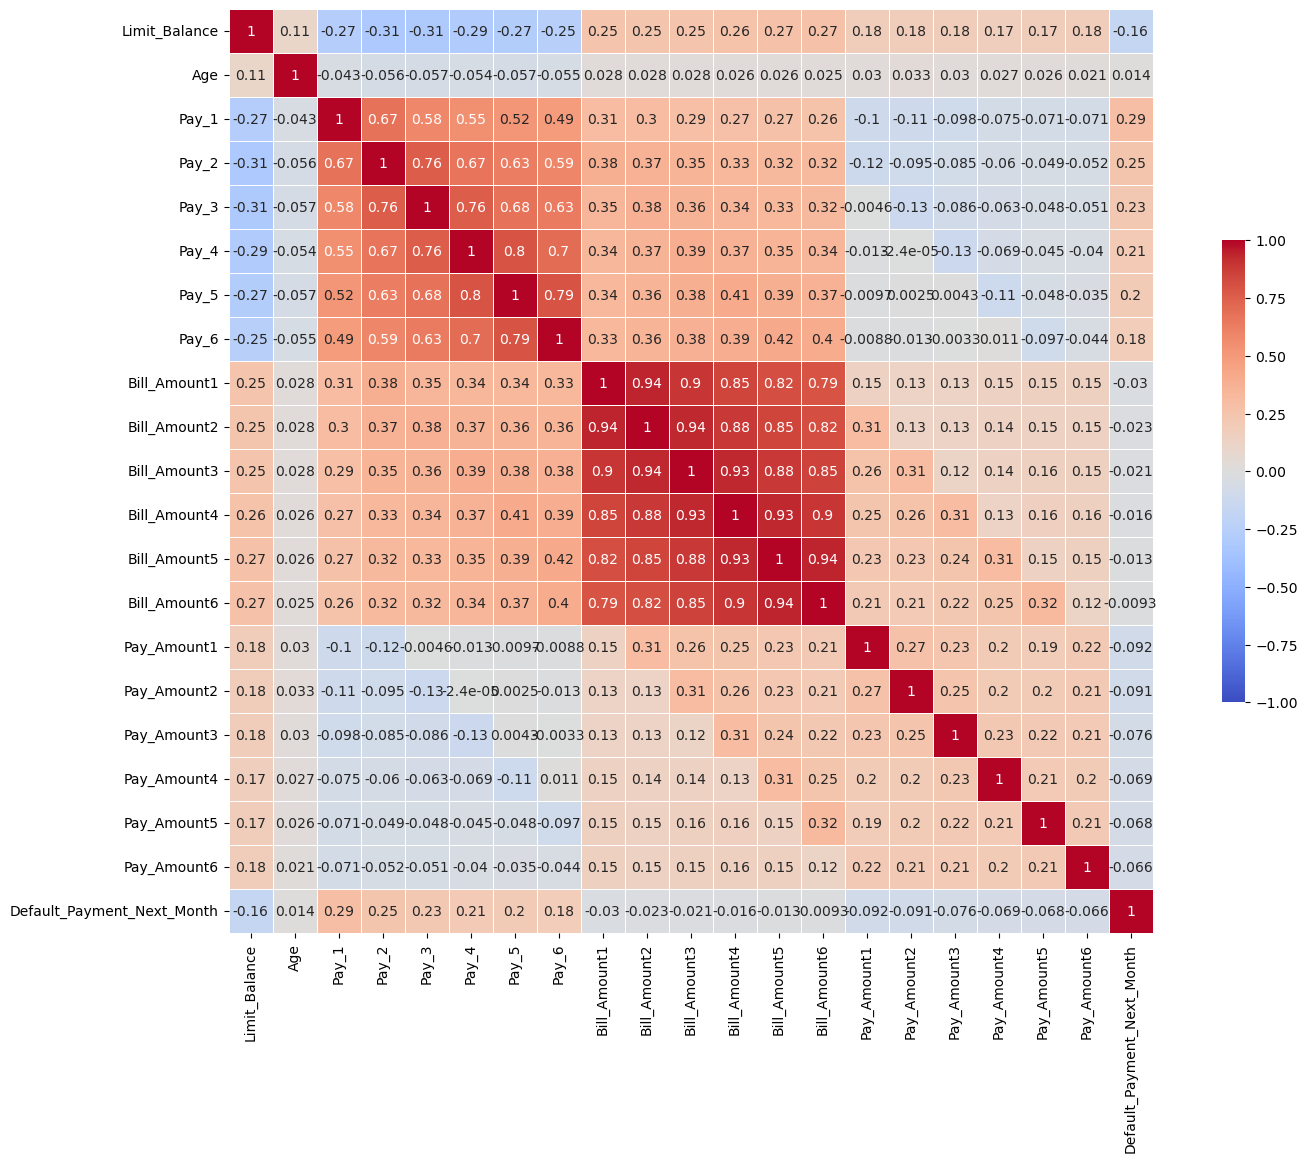

In [51]:
corr = df[['Limit_Balance','Age','Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6','Bill_Amount1','Bill_Amount2','Bill_Amount3','Bill_Amount4','Bill_Amount5','Bill_Amount6','Pay_Amount1','Pay_Amount2','Pay_Amount3','Pay_Amount4','Pay_Amount5','Pay_Amount6', 'Default_Payment_Next_Month']].corr()

f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='coolwarm', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

In [52]:
df1 = df[['Limit_Balance','Age','Pay_1','Pay_2','Pay_3','Pay_4','Pay_5','Pay_6','Bill_Amount1','Bill_Amount2','Bill_Amount3','Bill_Amount4','Bill_Amount5','Bill_Amount6','Pay_Amount1','Pay_Amount2','Pay_Amount3','Pay_Amount4','Pay_Amount5','Pay_Amount6']].copy()

fea_corr = df1.corrwith(df['Default_Payment_Next_Month'])

In [53]:
fea_corr

Limit_Balance   -0.164599
Age              0.014170
Pay_1            0.292517
Pay_2            0.248232
Pay_3            0.225613
Pay_4            0.208662
Pay_5            0.197589
Pay_6            0.180590
Bill_Amount1    -0.029835
Bill_Amount2    -0.022954
Bill_Amount3    -0.020536
Bill_Amount4    -0.015984
Bill_Amount5    -0.013346
Bill_Amount6    -0.009284
Pay_Amount1     -0.092260
Pay_Amount2     -0.091131
Pay_Amount3     -0.075771
Pay_Amount4     -0.068915
Pay_Amount5     -0.068341
Pay_Amount6     -0.066152
dtype: float64

In [54]:
from sklearn.linear_model import Lasso, LassoCV

# Lasso regression model
l_model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)

# Fitting the model
l_model.fit(X_train_scaled,y_train_en_smote)

#coefficients and selected features
coef = l_model.coef_
sel_features = np.where(coef != 0)[0]

feature_names = df.columns[sel_features]
print(feature_names)

Index(['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6',
       'Default_Payment_Next_Month', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2',
       'Education_3'],
      dtype='object')


In [55]:
cols = ['Age','Limit_Balance', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6']

col = ['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2',
       'Education_3']



selected_column_indices = np.where(np.in1d(cols, col))[0]

#training and test sets for KNN, Logistic and SVM
#selected the features from scaled and encoded set
X_train_sel = X_train_scaled[:, selected_column_indices].copy()
X_test_sel = X_test_scaled[:, selected_column_indices].copy()



#training and test sets for Random Forest and Decision Tree
#selected the features from encoded set
df_train = pd.DataFrame(X_train_en_smote, columns = ['Age','Limit_Balance', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6'])

df_test = pd.DataFrame(X_test_en, columns = ['Age','Limit_Balance', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4',
       'Pay_5', 'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4', 'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4','Pay_Amount5', 'Pay_Amount6'])

X_train_s = df_train[['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2',
       'Education_3']]
X_test_s = df_test[['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2',
       'Education_3']]

The connection between the target and features is not very strong, showing that there might be non-linear relationships. Lasso regression is well-suited for capturing both linear and non-linear relationships by penalizing absolute coefficient values. So, we decided to use Lasso regression to pick out the most important features. Lasso is good for finding both simple and more complicated connections because it adjusts the impact of different features. This helps us narrow down the features that matter the most for predicting the target.

# Hyperparameter Tuning

In machine learning, models often have parameters that are learned during training (such as weights in neural networks), and they also have hyperparameters that are set prior to training, impact machine learning model’s performance. 
Proper tuning is crucial for optimal results on unseen data. 
Grid Search is a hyperparameter tuning technique, systematically explores predefined set of hyperparameter combinations to find the best-performing model configuration.


Cross-validation is a resampling technique used to assess the performance of a machine-learning model. 
It involves partitioning the dataset into multiple subsets, training the model on some of the subsets, and evaluating its performance on the remaining subsets. It helps in estimating how well a model generalizes to new, unseen data. 
we considered 3 or 5-fold cross-validation for all the models, the dataset is divided into 3 or 5 subsets or folds. The training and evaluation are then repeated 5 times, each time using a different fold as the test set and the remaining folds as the training set. This provides a more comprehensive assessment of the model’s performance compared to a single train-test split.


### Logistic Regression

In [56]:
#GridsearchCV and scoring method is accuracy
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}, cv=5, scoring='accuracy')

Logistic Regression has fewer hyperparameters like regularization strength (C) and penalty. 


In [57]:
#fitting the model
grid_cv.fit(X_train_sel,y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             scoring='accuracy')

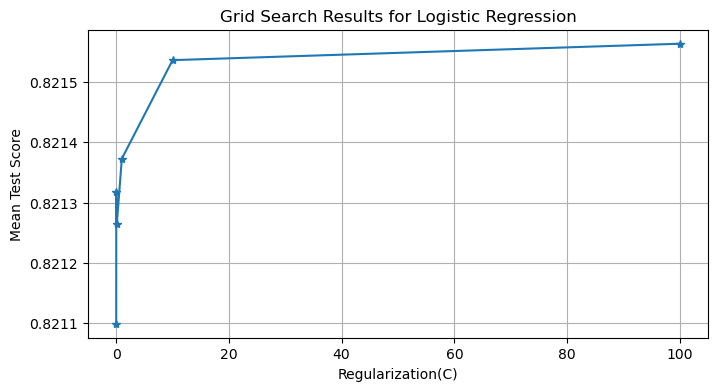

In [58]:
# Plot for different values of C vs accuracy
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}
plt.figure(figsize=(8, 4))
plt.plot(param_grid['C'], grid_cv.cv_results_['mean_test_score'], marker='*')
plt.title('Grid Search Results for Logistic Regression')
plt.xlabel('Regularization(C)')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

As the C value increases, there is an improvement of accuracy

In [59]:
#Best model
print("Best Parameters:",grid_cv.best_params_)

#Best estimator
modl_best = grid_cv.best_estimator_

#predicting the values
y_pred_lr = modl_best.predict(X_test_sel)

#performance metrics
accuracy = accuracy_score(y_test_en, y_pred_lr)
recall = recall_score(y_test_en, y_pred_lr, average='weighted')
f1 = f1_score(y_test_en, y_pred_lr, average='weighted')
precision = precision_score(y_test_en, y_pred_lr, average='weighted')

sc_methods['tuned : Logistic Regression'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

Best Parameters: {'C': 100, 'penalty': 'l2'}


In [60]:
sc_methods['tuned : Logistic Regression']

{'Accuracy': 0.7984102824285473,
 'Recall': 0.7984102824285473,
 'F1 Score': 0.7677642961772807,
 'Precision': 0.7730505950689922}

In [61]:
print(classification_report(y_test_en, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4585
           1       0.61      0.28      0.38      1328

    accuracy                           0.80      5913
   macro avg       0.72      0.61      0.63      5913
weighted avg       0.77      0.80      0.77      5913



In [62]:
#Barplot comparing metrics before and after tuning for Logistic Regression
import plotly.graph_objects as go

models = list(sc_methods.keys())
mdls = ['Logistic Regression', 'tuned : Logistic Regression']
metrics = list(sc_methods[models[0]].keys())
colors = {'Logistic Regression': 'blue', 'tuned : Logistic Regression': 'orange'}

t = []
for m in mdls:
    val = [sc_methods[m][metric] for metric in metrics]
    trace = go.Bar(x=metrics, y=val, name=m, marker=dict(color=colors[m]))
    t.append(trace)



lay = go.Layout(
    title='Comparison of Performance Metrics between Models',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

fig = go.Figure(data=t, layout=lay)
pyo.plot(fig, filename='LogisticRegression.html', auto_open=False)
fig.show()

### KNN

In [63]:
#Gridsearch CV for KNN
param_grid = {"n_neighbors": [5,7,8,9,10,11,12],
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]}
grid_cv = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid, cv=5, scoring='accuracy')

The evaluation 	considers varyig neighbors, with “uniform” assigning equal weights to all, and “distance” giving more weights to neighbors and p values are 1,2 stating Manhattan and Euclidean distance. 


In [64]:
#Fitting the model
grid_cv.fit(X_train_sel,y_train_en_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 8, 9, 10, 11, 12], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [65]:
#Best parameters
print("Best Parameters:",grid_cv.best_params_)

Best Parameters: {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [66]:
#Best Estimator
modl_best = grid_cv.best_estimator_
modl_best

KNeighborsClassifier(n_neighbors=12, p=1, weights='distance')

In [67]:
#predicting the values
y_pred_knn = modl_best.predict(X_test_sel)

In [68]:
#Performance metrics
accuracy = accuracy_score(y_test_en, y_pred_knn)
recall = recall_score(y_test_en, y_pred_knn, average='weighted')
f1 = f1_score(y_test_en, y_pred_knn, average='weighted')
precision = precision_score(y_test_en, y_pred_knn, average='weighted')

sc_methods['tuned : KNN'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

In [69]:
sc_methods['tuned : KNN']

{'Accuracy': 0.7728733299509555,
 'Recall': 0.7728733299509555,
 'F1 Score': 0.7566624526122675,
 'Precision': 0.7494384600580613}

In [70]:
print(classification_report(y_test_en, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4585
           1       0.49      0.34      0.40      1328

    accuracy                           0.77      5913
   macro avg       0.66      0.62      0.63      5913
weighted avg       0.75      0.77      0.76      5913



In [71]:
#Barplot comparing metrics before and after tuning for KNN
mdls = ['KNN', 'tuned : KNN']
metrics = list(sc_methods[models[0]].keys())
colors = {'KNN': 'red', 'tuned : KNN': 'green'}

t = []
for m in mdls:
    val = [sc_methods[m][metric] for metric in metrics]
    trace = go.Bar(x=metrics, y=val, name=m, marker=dict(color=colors[m]))
    t.append(trace)

lay = go.Layout(
    title='Comparison of Performance Metrics between Models',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

fig = go.Figure(data=t, layout=lay)
pyo.plot(fig, filename='KNN.html', auto_open=False)
fig.show()

### Random Forest

In [72]:
#Grid search cv for Random Forest
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [5,10,15,20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 7]
}
grid_cv = GridSearchCV(estimator = RandomForestClassifier(random_state=42),param_grid=param_grid, cv=3, scoring='accuracy')

The hyperparameters in random forest includes number of trees, maximum depth and other parameters. 


In [73]:
#Fitting the model
grid_cv.fit(X_train_s,y_train_en_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [74]:
#Best parameters
print("Best Parameters:",grid_cv.best_params_)

#Best Estimator
modl_best = grid_cv.best_estimator_

#Predicting the values
y_pred_rf = modl_best.predict(X_test_s)

#Performance metrics
accuracy = accuracy_score(y_test_en, y_pred_rf)
recall = recall_score(y_test_en, y_pred_rf, average='weighted')
f1 = f1_score(y_test_en, y_pred_rf, average='weighted')
precision = precision_score(y_test_en, y_pred_rf, average='weighted')

sc_methods['tuned : Random Forest'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Increasing the number of trees can improve the model’s robustness but also increase the computation time.
 Deeper trees can capture more complex relationships in the data, but there is a risk of overfitting. 


In [75]:
sc_methods['tuned : Random Forest']

{'Accuracy': 0.8038220869271098,
 'Recall': 0.8038220869271098,
 'F1 Score': 0.7919892124430714,
 'Precision': 0.7878848476226409}

In [76]:
print(classification_report(y_test_en, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4585
           1       0.59      0.43      0.49      1328

    accuracy                           0.80      5913
   macro avg       0.72      0.67      0.69      5913
weighted avg       0.79      0.80      0.79      5913



In [77]:
#Barplot comparing metrics before and after tuning for Random Forest
mdls = ['Random Forest', 'tuned : Random Forest']
metrics = list(sc_methods[models[0]].keys())
colors = {'Random Forest': 'blue', 'tuned : Random Forest': 'green'}

t = []
for m in mdls:
    val = [sc_methods[m][metric] for metric in metrics]
    trace = go.Bar(x=metrics, y=val, name=m,marker=dict(color=colors[m]) )
    t.append(trace)

lay = go.Layout(
    title='Comparison of Performance Metrics between Models',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

fig = go.Figure(data=t, layout=lay)
pyo.plot(fig, filename='RF.html', auto_open=False)
fig.show()

### SVM with linear and non linear kernel

In [78]:
#Grid search cv for svm
param_grid = {
    'C': [0.01,0.1,1],
    'kernel': ['linear','rbf','poly']
}
grid_cv = GridSearchCV(estimator = SVC(random_state=42),param_grid=param_grid, cv=3, scoring='accuracy')

Some key hyperparameters for SVM are C (regularization parameter), kernel type.


In [79]:
#Fitting the model
grid_cv.fit(X_train_sel,y_train_en_smote)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [80]:
#Best parameters
print("Best Parameters:",grid_cv.best_params_)

#Best Estimator
modl_best = grid_cv.best_estimator_

#Predicting the values
y_pred_svm = modl_best.predict(X_test_s)

#Performance metrics
accuracy = accuracy_score(y_test_en, y_pred_svm)
recall = recall_score(y_test_en, y_pred_svm, average='weighted')
f1 = f1_score(y_test_en, y_pred_svm, average='weighted')
precision = precision_score(y_test_en, y_pred_svm, average='weighted')

sc_methods['tuned : SVM'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

Best Parameters: {'C': 0.01, 'kernel': 'linear'}


In [81]:
sc_methods['tuned : SVM']

{'Accuracy': 0.7471672585827837,
 'Recall': 0.7471672585827837,
 'F1 Score': 0.6851286054092353,
 'Precision': 0.6608023325877228}

In [82]:
print(classification_report(y_test_en, y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4585
           1       0.26      0.07      0.11      1328

    accuracy                           0.75      5913
   macro avg       0.52      0.51      0.48      5913
weighted avg       0.66      0.75      0.69      5913



In [83]:
#Barplot comparing metrics before and after tuning for SVM
mdls = ['SVC', 'tuned : SVM']
metrics = list(sc_methods[models[0]].keys())
colors = {'SVC': 'red', 'tuned : SVM': 'blue'}

t = []
for m in mdls:
    val = [sc_methods[m][metric] for metric in metrics]
    trace = go.Bar(x=metrics, y=val, name=m, marker=dict(color=colors[m]))
    t.append(trace)

lay = go.Layout(
    title='Comparison of Performance Metrics between Models',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

fig = go.Figure(data=t, layout=lay)
pyo.plot(fig, filename='SVM_linear.html', auto_open=False)
fig.show()

Our grid search covers hyperparameters such as the kernel type (linear and non-linear) and C (regularization parameter) based on type of non-linear kernel gamma and degree comes into picture for RBF and polynomial kernel, crucial for defining the SVM’s decision boundary. We performed a grid search over hyperparameters, such as the kernel type and C (regularization parameter). There is reduction in accuracy after tuning, may be because of the overfitting of the model.


### Decision Trees

In [84]:
#GridSearchCV for Decision Trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3],
}
grid_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),param_grid =param_grid, cv=3, scoring='accuracy')

Some key hyperparameters for decision trees are maximum depth, minimum samples per leaf and tree influencing the tree’s depth and complexity

Also, the criterion function is used to measure the quality of split. Common options are “gini” for gini impurity and “entropy” for information gain. 

In [85]:
#Fitting the model
grid_cv.fit(X_train_s,y_train_en_smote)

#Best Parameters
print("Best Parameters:",grid_cv.best_params_)

#Best Estimator
modl_best = grid_cv.best_estimator_

#Predicting the values
y_pred_dt = modl_best.predict(X_test_s)

#Performance metrics
accuracy = accuracy_score(y_test_en, y_pred_dt)
recall = recall_score(y_test_en, y_pred_dt, average='weighted')
f1 = f1_score(y_test_en, y_pred_dt, average='weighted')
precision = precision_score(y_test_en, y_pred_dt, average='weighted')

sc_methods['tuned : Decision Trees'] = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision
}

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [86]:
sc_methods['tuned : Decision Trees']

{'Accuracy': 0.7865719600879418,
 'Recall': 0.7865719600879418,
 'F1 Score': 0.7750556892991699,
 'Precision': 0.7694595153555447}

In [87]:
print(classification_report(y_test_en, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4585
           1       0.53      0.40      0.46      1328

    accuracy                           0.79      5913
   macro avg       0.69      0.65      0.66      5913
weighted avg       0.77      0.79      0.78      5913



In [88]:
#Barplot comparing metrics before and after tuning for Decision Trees
mdls = ['Decision Trees', 'tuned : Decision Trees']
metrics = list(sc_methods[models[0]].keys())

t = []
for m in mdls:
    val = [sc_methods[m][metric] for metric in metrics]
    trace = go.Bar(x=metrics, y=val, name=m)
    t.append(trace)

lay = go.Layout(
    title='Comparison of Performance Metrics between Models',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)
pyo.plot(fig, filename='DecisionTrees.html', auto_open=False)
fig = go.Figure(data=t, layout=lay)
fig.show()

In [91]:
#Barplot for Accuracy comparing different models
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

models = list(sc_methods.keys())
metrics = ['Accuracy']
values = [sc_methods[model]['Accuracy'] for model in models]
trace = go.Bar(x=models, y=values, name='Accuracy', marker=dict(color ='blue'))

layout = go.Layout(
    title='Accuracy for Different Models',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Accuracy'),
)

fig = go.Figure(data=[trace], layout=layout)
pyo.plot(fig, filename='comparisions.html', auto_open=False)
iplot(fig)

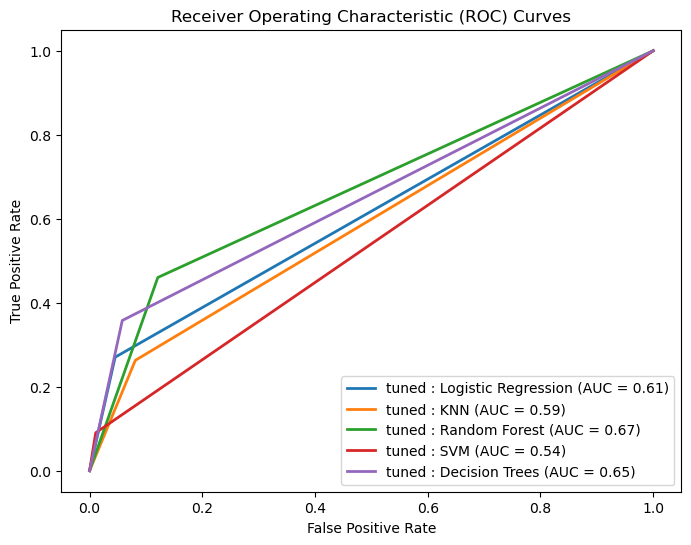

In [90]:
from sklearn.metrics import roc_curve, auc
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}
# Compute ROC curve and ROC area
models=['tuned : Logistic Regression','tuned : KNN','tuned : Random Forest','tuned : SVM','tuned : Decision Trees']
for m, y_scr in zip(models, [y_lr_pred, y_knn_pred,y_rf_pred,y_svml_pred,y_svmn_pred,y_dt_pred,y_pred_lr, y_pred_knn,y_pred_rf,y_pred_svm,y_pred_dt]):
    fpr, tpr, _ = roc_curve(y_test_en, y_scr)
    roc_auc = auc(fpr, tpr)

    fpr_dict[m] = fpr
    tpr_dict[m] = tpr
    roc_auc_dict[m] = roc_auc

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
for c in models:
    plt.plot(fpr_dict[c], tpr_dict[c], lw=2, label=f'{c} (AUC = {roc_auc_dict[c]:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

Random Forest has the highest AUC of 0.67

The best-performing models, Random Forest (RF) and Logistic Regression achieved an impressive accuracy of 80%. 
 Before hyperparameter tuning, these models demonstrated notable predictive capabilities, while post-tuning refinement further enhanced their accuracy, solidifying their effectiveness in accurately classifying credit card default cases. 
The optimized Random Forest and Logistic Regression models, with their balanced blend of robustness and precision, showcase their suitability for the task of credit card default prediction 